In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', \
                       parse_dates=['ScheduledDay', 'AppointmentDay'])

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df = df.drop(df[df['Age']<0].index,axis=0) #Dropping age values under 0
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday',' Sunday']

df['Day'] = pd.to_datetime(df['AppointmentDay']).dt.dayofweek 
df['Day'] = df['Day'].map(lambda x: days[x])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['Datedifference'] = df['AppointmentDay'] - df['ScheduledDay']
df = df[df['Datedifference']>='0 days']
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day,Datedifference
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0 days


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110521,1.47491e+14,2.56086e+14,39217.8,4.17246e+12,3.17318e+13,9.43896e+13,9.99982e+14
AppointmentID,110521,5.6753e+06,71296.9,5.03023e+06,5.64028e+06,5.68057e+06,5.72552e+06,5.79048e+06
Age,110521,37.0894,23.1099,0,18,37,55,115
Scholarship,110521,0.0982709,0.297682,0,0,0,0,1
Hipertension,110521,0.197257,0.397929,0,0,0,0,1
Diabetes,110521,0.0718687,0.258272,0,0,0,0,1
Alcoholism,110521,0.0304015,0.17169,0,0,0,0,1
Handcap,110521,0.0222311,0.161494,0,0,0,0,4
SMS_received,110521,0.321043,0.466879,0,0,0,1,1
Datedifference,110521,10 days 04:25:27.412889,15 days 06:07:25.262183,0 days 00:00:00,0 days 00:00:00,4 days 00:00:00,15 days 00:00:00,179 days 00:00:00


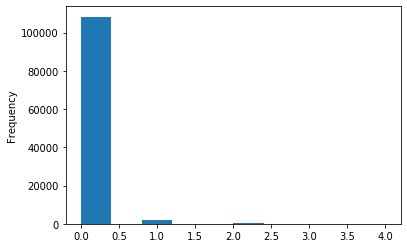

In [11]:
df['Handcap'].plot(kind='hist')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   PatientId       110521 non-null  float64        
 1   AppointmentID   110521 non-null  int64          
 2   Gender          110521 non-null  object         
 3   ScheduledDay    110521 non-null  object         
 4   AppointmentDay  110521 non-null  object         
 5   Age             110521 non-null  int64          
 6   Neighbourhood   110521 non-null  object         
 7   Scholarship     110521 non-null  int64          
 8   Hipertension    110521 non-null  int64          
 9   Diabetes        110521 non-null  int64          
 10  Alcoholism      110521 non-null  int64          
 11  Handcap         110521 non-null  int64          
 12  SMS_received    110521 non-null  int64          
 13  No-show         110521 non-null  bool           
 14  Day             1105

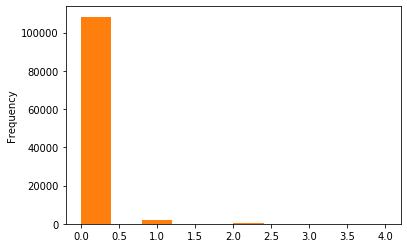

In [21]:
df['No-show'] = df['No-show'].apply(lambda x: False if x=='No' else True) #convert no-show to boolean
df.info()

df['Handcap'].plot(kind='hist')

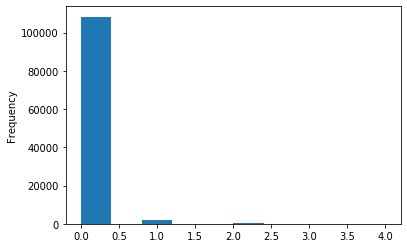

In [24]:
df[df['No-show']]['Handcap'].plot(kind='hist')

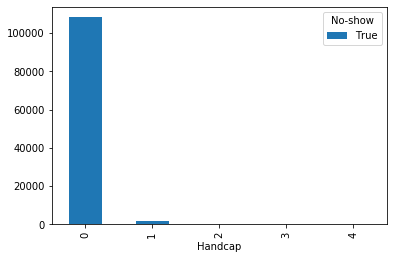

In [34]:
df.groupby(['Handcap','No-show'])['Handcap'].count().unstack('No-show').plot(kind='bar',stacked=True)
locs = np.arange(0,1)
#plt.xticks(locs,locs)
plt.show()

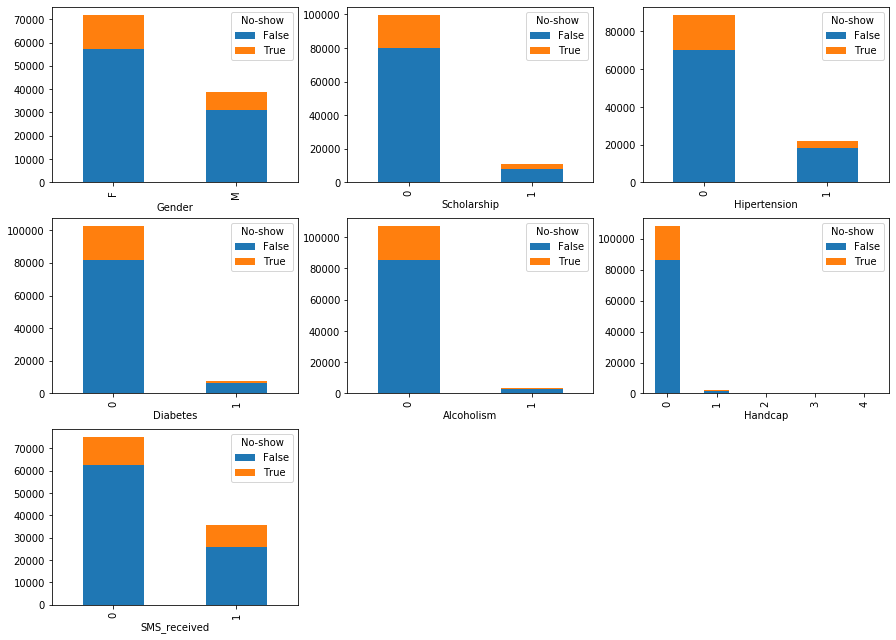

In [13]:
categories = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

fig = plt.figure(figsize=(15, 11))
for i, var in enumerate(categories):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No-show'])[var].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True)

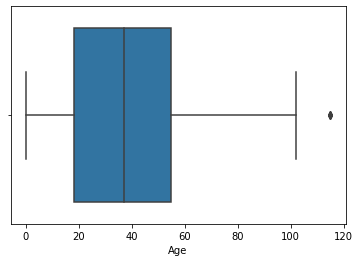

In [14]:
#Age distribution
plt.xticks()
_ = sns.boxplot(x=df.Age)

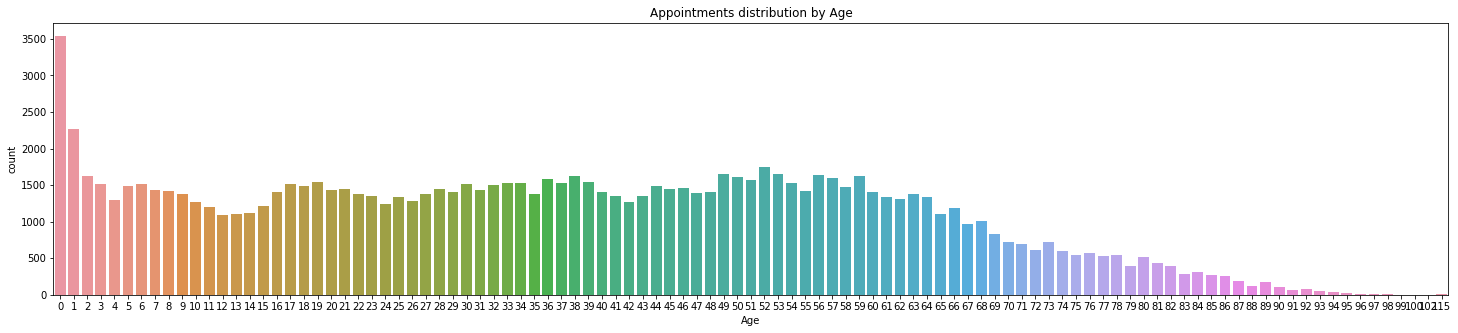

In [15]:
plt.figure(figsize=(25,5))
plt.xticks()
ax = sns.countplot(x=df.Age)
ax.set_title("Appointments distribution by Age")
plt.show()

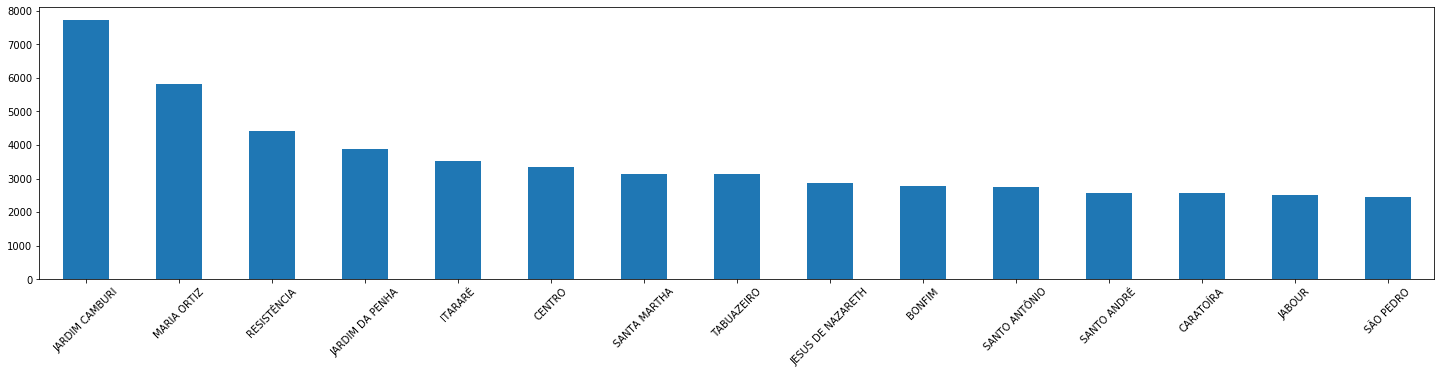

In [36]:
df['Neighbourhood'].value_counts()[0:15].plot(kind='bar',rot=45,figsize=(25,5)) 

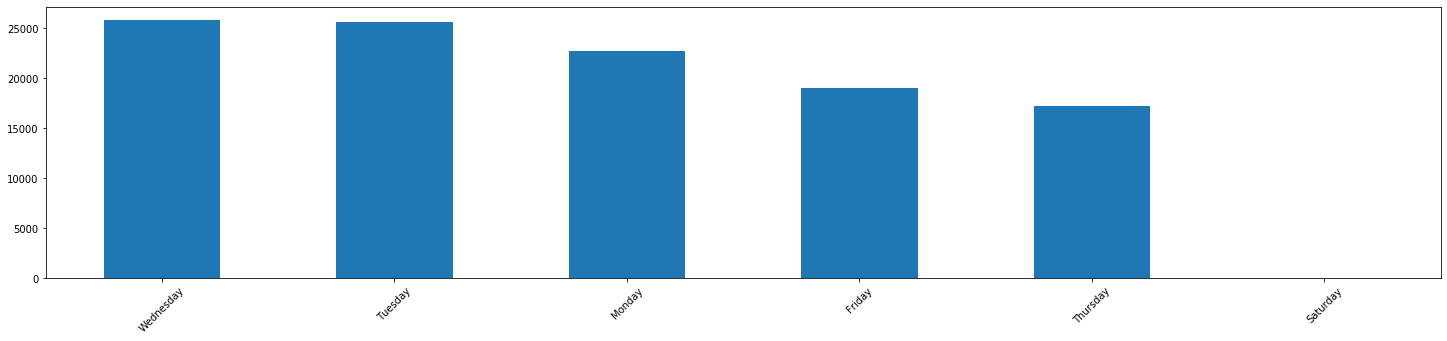

In [37]:
df['Day'].value_counts().plot(kind='bar',rot=45,figsize=(25,5)) 

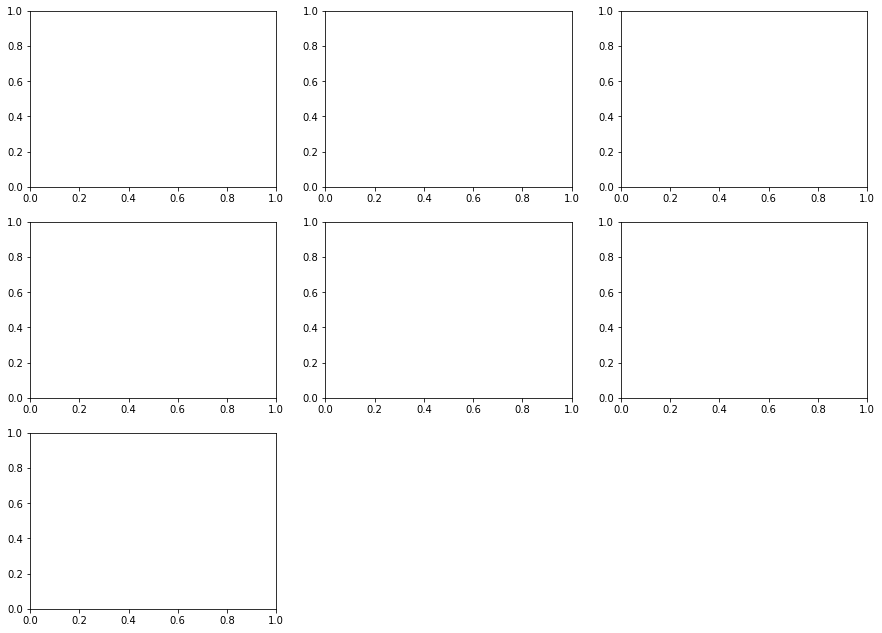

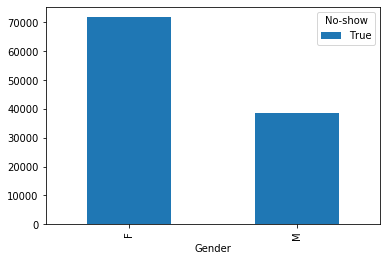

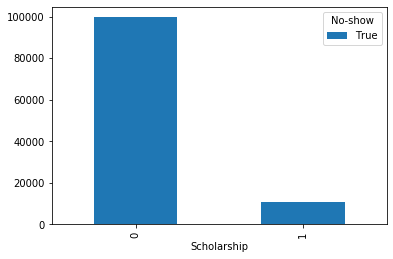

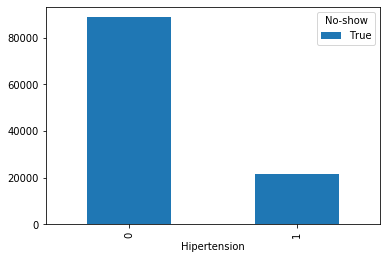

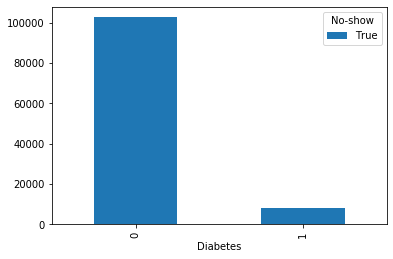

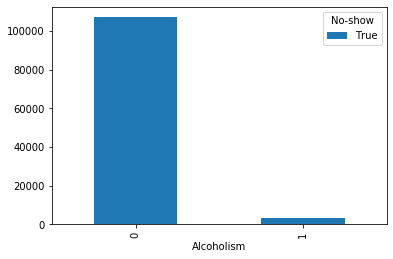

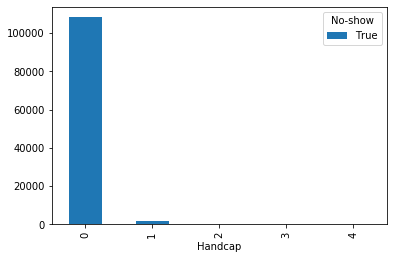

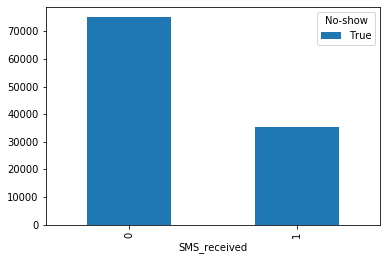

In [40]:
fig = plt.figure(figsize=(15, 11))
for i, var in enumerate(categories):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var,'No-show'])[var].count().unstack('No-show').plot(kind='bar')